In [1]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from IPython.core.display import Image, display
import pandas as pd

options = Options()
options.headless = True # headless means "no graphical interface"
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

def show_screen():
    b.set_window_size(200, 300)
    b.save_screenshot("screen.png")
    display(Image("screen.png"))
    
def grab_table(tbl):
    trs = tbl.find_elements(by="tag name", value="tr")
    rows = []
    for tr in trs:
        row = tr.find_elements(by="tag name", value="td")
        row = [td.text for td in row]
        rows.append(row)
    return pd.DataFrame(rows[1:], columns=rows[0])

In [2]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page4.html"
b.get(url)

In [3]:
import pandas as pd

def get_year(year):
    search = b.find_element(value="year")
    button = b.find_element(value="search_btn")
    search.clear()
    search.send_keys(year)
    button.click()
    #show_screen()
    table_element = b.find_element(value="hurricanes")
    return grab_table(table_element)

# GOALS:
# 1. create a giant DataFrame with all the rows
# 2. create a line plot with year on the x-axis, number of hurricanes on y-axis

data_frames = []

s = pd.Series(dtype=float)

for year in range(1950, 2011):
    df = get_year(year)
    s.loc[year] = len(df)
    data_frames.append(df)

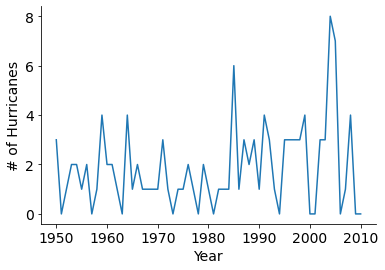

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

ax = s.plot.line() # Series index => x-axis, Series values => y-axis
ax.set_xlabel("Year")
ax.set_ylabel("# of Hurricanes")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [5]:
df = pd.concat(data_frames).reset_index(drop=True)
df

,name,formed,dissipated,mph,damage,deaths
0,Baker,08/18/1950,09/01/1950,105,2.55M,38
1,Easy,09/01/1950,09/09/1950,125,3.3M,2
2,King,10/13/1950,10/20/1950,130,32M,11
3,Able,08/18/1952,09/02/1952,105,2.75M,3
4,FLORENCE,09/23/1953,09/26/1953,115,200K,0
...,...,...,...,...,...,...
108,Humberto,09/12/2007,09/14/2007,90,50M,1
109,Gustav,08/25/2008,09/07/2008,150,8.31B,112
110,Dolly,07/20/2008,07/27/2008,100,1.6B,1
111,Ike,09/01/2008,09/15/2008,145,38B,214


# Crawl Graph of Pages (BFS), Generate Graphviz Visual

https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/2.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/3.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/4.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/5.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/6.html


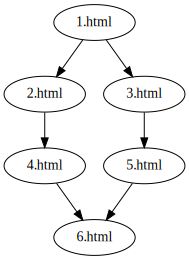

In [6]:
from collections import deque
from graphviz import Digraph

gv = Digraph()

#start_url = "https://tyler.caraza-harter.com/cs320/crawl/calendar/A.html"
start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
nodes_to_visit = deque([start_url])
added = {start_url}

while len(nodes_to_visit) > 0: # loop as long as there is work to be done
    # 1. do work
    curr_node = nodes_to_visit.popleft() # .pop(0)
    print(curr_node)
    gv.node(curr_node.split("/")[-1])
    b.get(curr_node)
    
    # 2. record new work to do in future
    links = b.find_elements(by="tag name", value="a")
    for link in links: # each link is a child
        child_url = link.get_attribute("href")
        
        gv.edge(curr_node.split("/")[-1], child_url.split("/")[-1])
        
        if not child_url in added:
            nodes_to_visit.append(child_url)
            added.add(child_url)
    #print(nodes_to_visit)

gv